# Week 4 Descriptive Modeling

## 4.2 Assignment: Clustering Exercise

### Instructions)

You will be using the dataset als_data.csv to apply clustering methods for this assignment. This data gives anonymized data on ALS patients. With this data, complete the following steps:

1. Remove any data that is not relevant to the patient’s ALS condition.
2. Apply a standard scalar to the data.
3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.
5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).
6. Fit a PCA transformation with two features to the scaled data.
7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.
8. Summarize your results and make a conclusion.

You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to add comments to all of your code and to document your steps, process, and analysis.

### Answer)

First we'll start off by loading the dataset and any required libraries.

**Reading and observing the data**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
##import seaborn as sns
##import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
als_df = pd.read_csv('C:/Users/ivan2/gitLocal/DSC630-SPRING2024/WK04-als_data.csv')
als_df.head(5)

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [3]:
als_df.shape

(2223, 101)

In [4]:
als_df.isnull().sum()

ID                 0
Age_mean           0
Albumin_max        0
Albumin_median     0
Albumin_min        0
                  ..
trunk_min          0
trunk_range        0
Urine.Ph_max       0
Urine.Ph_median    0
Urine.Ph_min       0
Length: 101, dtype: int64

**Descriptive Statistics**

In [5]:
als_df.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


**1) Remove any Columns not relevant to the patient's ALS Condition**

In [7]:
als_df = als_df.drop(['ID', 'SubjectID'], axis=1)

**2) Apply a standard scaler**

In [8]:
# initiating the scaler
scaler = StandardScaler()

columns_to_scale = als_df.columns # selecting all columns

# fit and transform the data
scaled_data = scaler.fit_transform(als_df[columns_to_scale])

# updating the df with scaled data
df_scaled = pd.DataFrame(scaled_data, columns = columns_to_scale)

df_scaled.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,-0.301588,...,2.992342,2.300470,0.260968,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532
1,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,0.166537,...,-1.198812,-0.278144,-0.489913,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151
2,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,-0.064100,...,1.595291,1.195350,-0.654169,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151
3,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,-0.685524,...,-0.639992,0.458603,-0.272701,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151
4,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,-0.350529,...,-0.081171,0.458603,-0.722774,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151


**3) Create a plot of the Cluster Silhouette Score vs the number of cluster in a k-means cluster.**

In [9]:
#scaled_data = # scaled data variable setup in the previous step

cluster_range = range(2, 11)  # range of clusters to evaluate, from 2 to 10

silhouette_scores = []

# Perform K-means clustering and compute silhouette scores
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.2f}")

Number of clusters: 2, Silhouette Score: 0.08
Number of clusters: 3, Silhouette Score: 0.07
Number of clusters: 4, Silhouette Score: 0.07
Number of clusters: 5, Silhouette Score: 0.06
Number of clusters: 6, Silhouette Score: 0.07
Number of clusters: 7, Silhouette Score: 0.05
Number of clusters: 8, Silhouette Score: 0.05
Number of clusters: 9, Silhouette Score: 0.05
Number of clusters: 10, Silhouette Score: 0.04


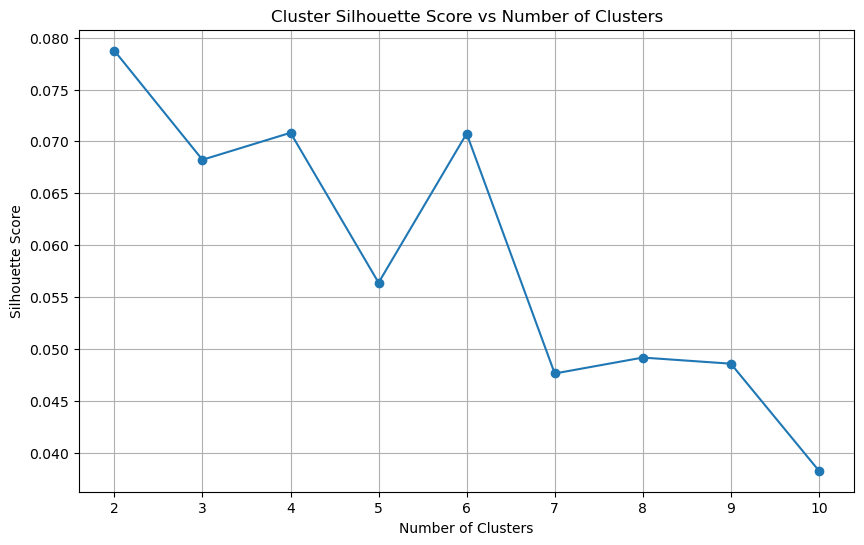

In [10]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Cluster Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

**4) Optimal number of Clusters**

When using Cluster Silhouette Scores to evaluate the optimal number of clusters to use, we should choose the score with the number of clusters with the highest score. In this case that is 2 clusters. However, we can also use domain knowledge to pick another high value if we believe additional clusters to be present in the data.

For this example I will use 6 clusters since it yields more groups while still retains a high Silhouette Score.

**5) Fit a K-means model to the data with the optimal number of clusters chosen in part (4).**

In [19]:
#scaled_data = # scaled data variable setup in the previous step

# KMeans model with 4 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model to your data
kmeans.fit(scaled_data)

# Get the cluster labels (the cluster each data point is assigned to)
cluster_labels = kmeans.labels_

# If you want to use the cluster centroids for any reason, you can access them like this
#cluster_centers = kmeans.cluster_centers_

# If you want to assign the labels directly and use them for analysis
# you could also use the fit_predict method
# cluster_labels = kmeans.fit_predict(scaled_data)

# Now you can add these cluster labels back to your original or scaled dataframe
# to perform further analysis if required.

**6) PCA Transformation**

In [20]:
from sklearn.decomposition import PCA


# Instantiate the PCA model with the top 2 principal components
pca = PCA(n_components=2)

# Fit the model to your data and transform it
pca_features = pca.fit_transform(scaled_data)

# 'pca_features' is now a 2D array with the new features

In [21]:
# The amount of variance that each PCA feature explains
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.11330548 0.06446615]


**7) Scatterplot of PCA transformed data**

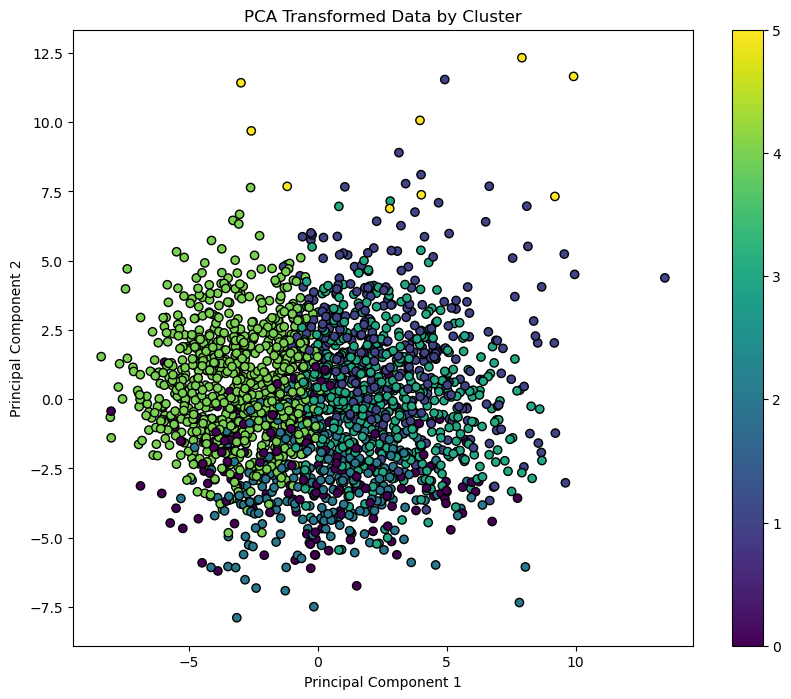

In [22]:
# Plotting the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')

# This adds a color bar to the side of the scatter plot to show the mapping from color to cluster label
plt.colorbar()

# Adding titles and labels
plt.title('PCA Transformed Data by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()

### Conclusion

**Summary:**

There is a significant correlation between attendance and the day of the week, with some days attracting more attendees than others.
The month also shows a significant correlation with attendance, suggesting that attendance varies seasonally.

Among the promotional items, bobbleheads stand out as having a highly significant positive correlation with attendance, confirming their effectiveness in attracting larger crowds.

Based on these findings, management should consider the timing of games and focus promotional efforts, especially on bobbleheads, to improve attendance. Additionally, while the day/night distinction and skies condition don't show a significant direct correlation with attendance, they may still influence the overall game day experience and should be considered in the broader context of game scheduling and marketing strategies.

Suppose management wished to break an attendance record. In that case, I recommend scheduling a game with the Nationals, Angels, White Sox, or Mets during a Tuesday Night in June or July and running a Bobbleheads promotion.